<a href="https://colab.research.google.com/github/saykim/ds/blob/main/%E2%98%85%5Bcoding_tip%5D%E2%98%85_keras_scikit_learn_210527.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scikit-Learn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

import statsmodels.api as sm
import statsmodels.formula as smf
from statsmodels.formula.api import ols


from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

import xgboost
import lightgbm
from sklearn.pipeline import Pipeline

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=.3, random_state=44)

In [ ]:
scaler = StandardScaler()
# scaler = MinMaxScaler()
scaler.fit(X_train)
X1_train_scaled = scaler.transform(X_train)
X1_test_scaled = scaler.transform(X_test)
X1_train = pd.DataFrame(data = X1_train_scaled, columns=X_train.columns)
X1_test = pd.DataFrame(data = X1_test_scaled, columns=X_test.columns) 

#pipeline 적용하는 것을 검토 필요

## statesmodels

In [ ]:
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()
model.summary()

## Scikit-Learn

In [ ]:
lr = LinearRegression(n_jobs=-1)
knn = KNeighborsRegressor( n_jobs=-1)
rfr = RandomForestRegressor(n_jobs=-1)
dtr = DecisionTreeRegressor()
elnet = ElasticNet()
gbr = GradientBoostingRegressor()
xgb = xgboost.XGBRegressor(n_jobs=-1)
#xgb GPU 활성화
# xgb = xgboost.XGBRegressor(n_jobs=-1, n_estimators=400, learning_rate=0.05, gamma=0, subsample=0.75, colsample_bytree=1,
#                            max_depth=7, tree_method='gpu_exact')
lgm = lightgbm.LGBMRegressor(n_jobs=-1)

In [ ]:
#Scaler 미적용 (X_train, X_test)
cv = KFold(5, shuffle=True, random_state=42)
def reg(model, X, y):
    model.fit(X, y)
    scores = cross_val_score(model, X, y,cv=cv) 
    print('cross-val-score\n{}'.format(scores))
    print('cross-val-score.mean\n{:.3f}'.format(scores.mean()))
    print('-----Y_Prediction-----')
    #Y_pred 결과
    y_pred = model.predict(X_test)
  
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    r2 = metrics.r2_score(y_test, y_pred)

    #예측 결과 저장
    mses.append(mse)
    rmses.append(rmse)
    maes.append(mae)
    r2s.append(r2)

    # 예측 결과 보여주기
    print('prediction MSE: \n{:.3f}'.format(mse))
    print('prediction RMSE: \n{:.3f}'.format(rmse))
    print('prediction MAE: \n{:.3f}'.format(mae))
    print('prediction r2 : \n{:.3f}'.format(r2))
    print('---------------------')

mses = []
rmses = []
maes = []
r2s = []

# list = [lr, elnet ,knn, rfr, dtr, gbr,xgb,lgm]
list = [lr, elnet ,knn, rfr, dtr, gbr,lgm]

for i in list:
    print(i)
    reg(i, X_train, y_train)

results1 = pd.DataFrame(index=['lr','elnet' ,'knn', 'rfr', 'dtr', 'gbr', 'lgm'])
results1['mse'] = pd.DataFrame(mses, index=['lr','elnet' ,'knn', 'rfr', 'dtr',  'gbr','lgm'])
results1['rmse'] = pd.DataFrame(rmses, index=['lr','elnet' ,'knn', 'rfr', 'dtr',  'gbr', 'lgm'])
results1['mae'] = pd.DataFrame(maes, index=['lr','elnet' ,'knn', 'rfr', 'dtr',  'gbr', 'lgm'])
results1['r2'] = pd.DataFrame(r2s, index=['lr','elnet' ,'knn', 'rfr', 'dtr',  'gbr', 'lgm'])

results1.round(2)

# KERAS

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop
from tensorflow.keras.utils import plot_model

import pydot

In [ ]:
X1_train.shape #Dimension을 찾아보기 위해

In [ ]:
inputs = Input(shape=(70,))

output = Dense(128, activation='relu')(inputs)
output = Dense(256, activation='relu')(output)
output = Dense(512, activation='linear')(output)
output = Dense(512, activation='relu')(output)
output = Dense(256, activation='relu')(output)
output = Dense(128, activation='relu')(output)
output = Dense(64, activation='linear')(output)
output = Dense(1)(output)

model = Model(inputs, output)
model.summary()
earlystopping = EarlyStopping(monitor='val_loss', patience=5)
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

In [ ]:
earlystopping = EarlyStopping(monitor='val_loss', patience=5)
# model.compile(optimizer='sgd', loss='mse', metrics=['mae', 'mse'])

# model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.compile(optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8), loss='mse', metrics=['mae','mse'])
# model.compile(optimizer=RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0), loss='mse', metrics=['mae', 'mse'])
#RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
#Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)


model.fit(x=X1_train, y=y_train, epochs=100, verbose=1, batch_size=10, callbacks=[earlystopping],
          validation_data=(X1_test, y_test))

In [ ]:
def plt_show_loss(model):
    plt.plot(model.history.history['loss'])
    plt.plot(model.history.history['val_loss'])
    plt.title('Mode Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc=0)

def plt_show_acc(model):
    plt.plot(model.history.history['mae'])
    plt.plot(model.history.history['val_mae'])
    plt.title('Model mae')
    plt.ylabel('Mae')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc=0)

plt_show_loss(model)
plt.show()

plt_show_acc(model)
plt.show()

In [ ]:
y_pred = model.predict(X1_test)
r2_score(y_test, y_pred)

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([0,14], [0,14], color='r') #기준선

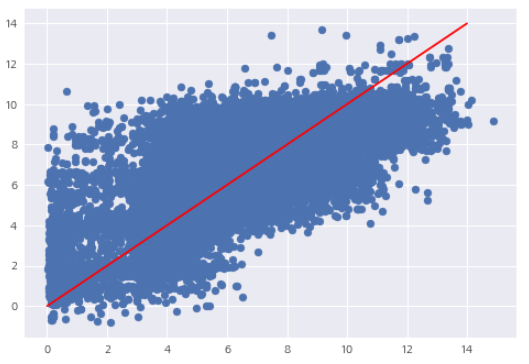